In [1]:
!pip install streamlit pandas matplotlib scikit-learn --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/SUDIPTO/Downloads/Starbucks_stock_history.csv")
df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1992-06-26,0.270957,0.287086,0.264507,0.277409,224358400,0.0,0.0
1,1992-06-29,0.280635,0.303215,0.274183,0.296763,58732800,0.0,0.0
2,1992-06-30,0.303215,0.306440,0.283860,0.287086,34777600,0.0,0.0
3,1992-07-01,0.290312,0.296763,0.280635,0.293538,18316800,0.0,0.0
4,1992-07-02,0.296763,0.296763,0.287086,0.293538,13996800,0.0,0.0


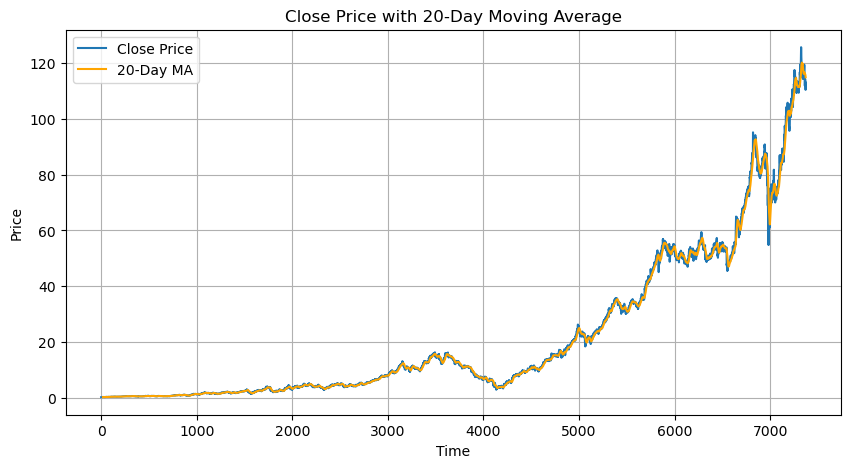

In [3]:
# Calculate 20-day Moving Average
df['MA20'] = df['Close'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA20'], label='20-Day MA', color='orange')
plt.title('Close Price with 20-Day Moving Average')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Close']

# Handle any NaN values from rolling average or missing data
X = X.fillna(0)
y = y.fillna(0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regressor': SVR()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    print(f'{name} MSE: {mse:.2f}')


Linear Regression MSE: 0.04
Random Forest MSE: 0.09
Support Vector Regressor MSE: 626.27


In [5]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('Starbucks_stock_history.csv')
df['MA20'] = df['Close'].rolling(window=20).mean()

st.title("📈 Starbucks Stock Analysis")

st.subheader("Raw Data")
st.dataframe(df.head())

# Sidebar feature selection
st.sidebar.title("Features Selection")
selected_features = st.sidebar.multiselect(
    'Choose input features:', ['Open', 'High', 'Low', 'Volume'], default=['Open', 'High']
)

# Plot section
st.subheader("📊 Close Price & Moving Average")
fig, ax = plt.subplots()
ax.plot(df['Close'], label='Close Price')
ax.plot(df['MA20'], label='20-Day MA', color='orange')
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.legend()
st.pyplot(fig)

# Model training
if st.button('Train Model'):
    df_clean = df.fillna(0)
    X = df_clean[selected_features]
    y = df_clean['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    st.success(f"Model trained. R² Score: {score:.2f}")
    st.write("Model Coefficients:", model.coef_)
    st.write("Model Intercept:", model.intercept_)


Writing app.py


In [ ]:
!streamlit run app.py